## Healthcare Employee Attrition 
### EDA & Prediction Model
##### Effects of oversampling and undersampling on precision & recall scores

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from lib.utils.MLUtils import MLUtils
from lib.utils.DataFrameUtils import DataframeUtils
mlutils = MLUtils()
dfutils = DataframeUtils()

pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
df = pd.read_csv("./resources/watson_healthcare_modified.csv")

Checking Data 

In [3]:
dfutils.check_df(df)

---------------- Info -----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-nul

## EDA, Feature Selection & Preprocessing


In [4]:
# Drop identifying data
df = df.drop('EmployeeID', axis=1)

# Drop static value
df.drop("Over18", axis = 1, inplace = True)

df.dropna()

# Dropping Duplicate rows
df1=df.duplicated()
df[~df1]


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,2,Female,94,3,2,Nurse,4,Single,5993,19479,8,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,3,Male,61,2,2,Other,2,Married,5130,24907,1,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,4,Male,92,2,1,Nurse,3,Single,2090,2396,6,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,4,Female,56,3,1,Other,3,Married,2909,23159,1,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,1,Male,40,3,1,Nurse,2,Married,3468,16632,9,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,3,Male,66,1,1,Nurse,4,Single,2340,23213,1,Yes,18,3,2,80,0,1,3,1,1,0,0,0
1672,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,3,Female,94,2,3,Nurse,4,Married,9071,11563,2,Yes,19,3,3,80,1,15,3,3,3,2,1,2
1673,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,4,Female,83,2,1,Other,2,Single,2836,11757,1,No,13,3,4,80,0,1,0,4,1,0,0,0
1674,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,4,Female,65,2,4,Therapist,4,Married,12742,7060,1,No,16,3,3,80,1,21,3,3,21,6,11,8


In [5]:
# Selecting features
numerical_columns = [col for col in df.columns if df[col].dtypes in ("int64", "float64")]
categorical_columns = [col for col in df.columns if df[col].dtypes in ("object", "category")]

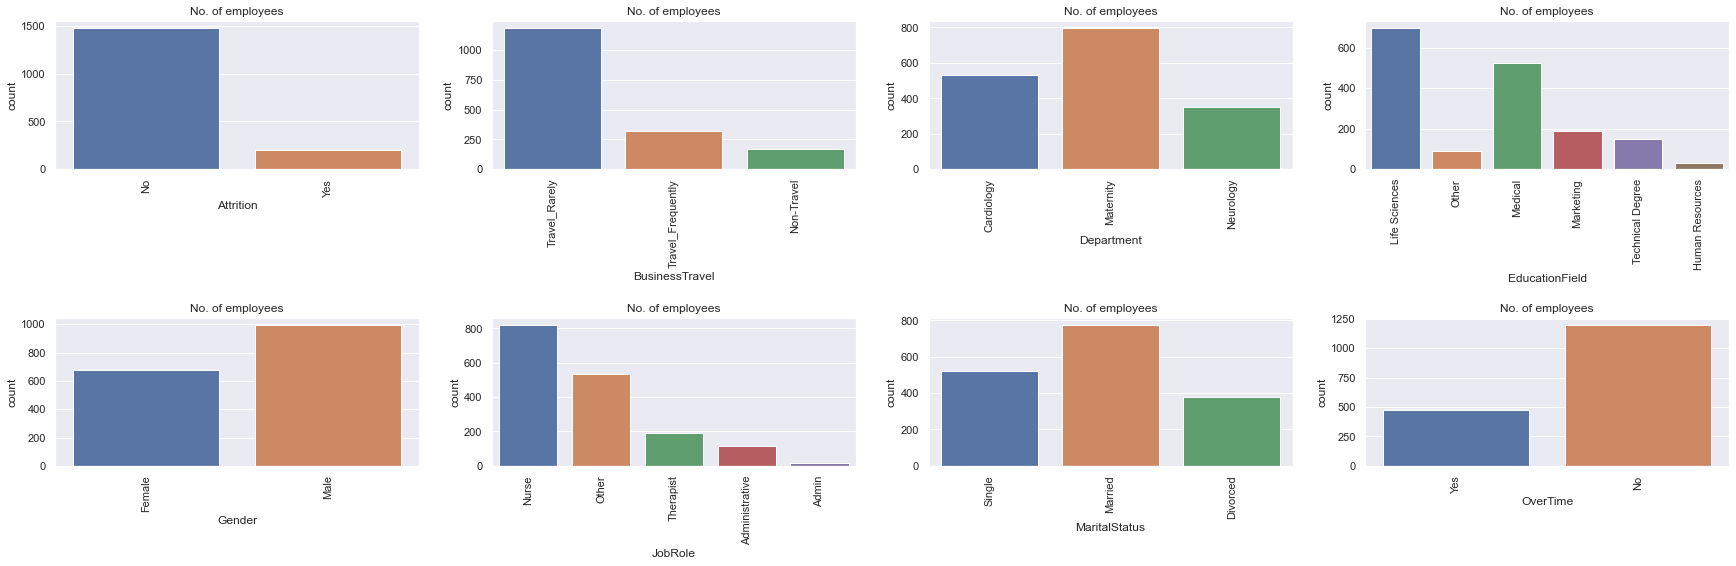

In [6]:
fig=plt.subplots(figsize=(30,30))
sns.set_theme(style="darkgrid")
for i, j in enumerate(categorical_columns):
    plt.subplot(6, 4, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df)
    plt.xticks(rotation=90)
    plt.title("No. of employees")

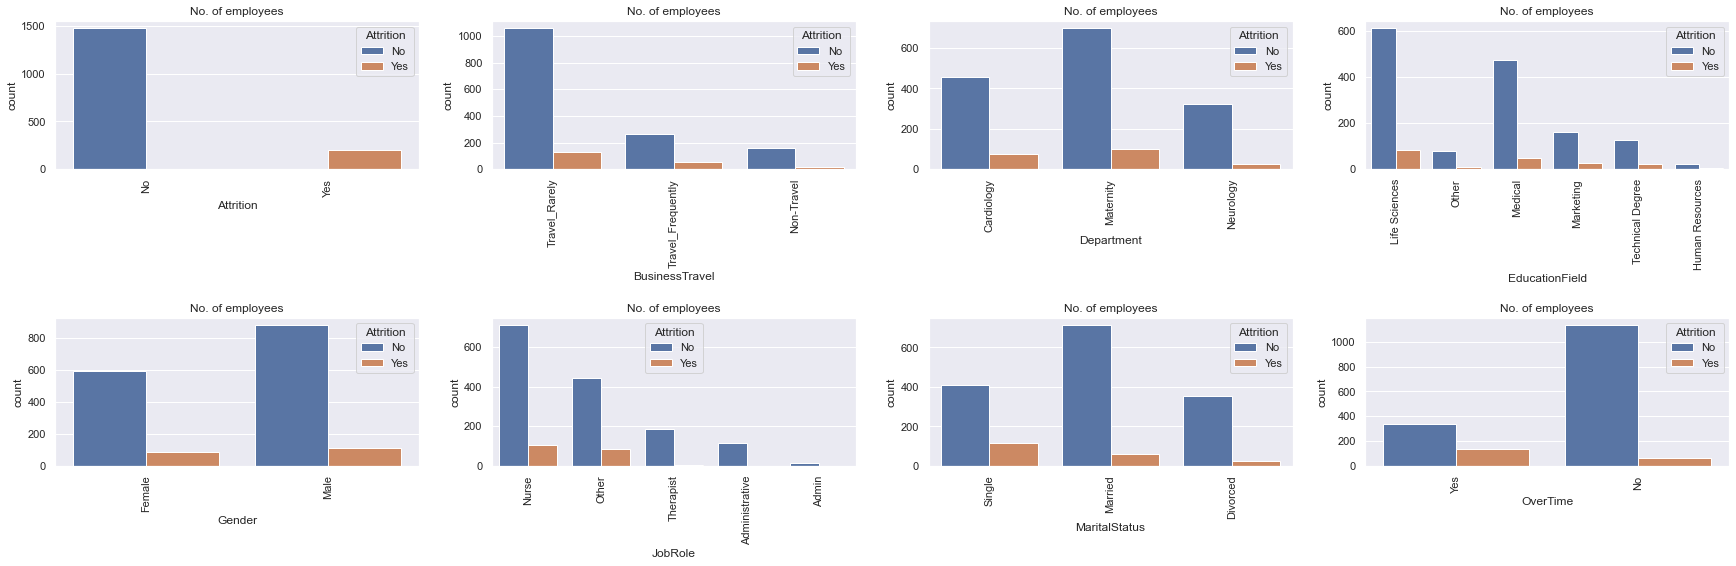

In [7]:
# Exploring Categorical Features with Attrition
fig=plt.subplots(figsize=(30,30))
sns.set_theme(style="darkgrid")
for i, j in enumerate(categorical_columns):
    plt.subplot(6, 4, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df, hue='Attrition')
    plt.xticks(rotation=90)
    plt.title("No. of employees")

### Model Design & Training

In [8]:
X = df.drop("Attrition", axis = 1)
y = df.Attrition == "Yes"
gvsearch_results = mlutils.gv_scoring(X, y, tran_enc=True)
gvsearch_results


,model,best_score,best_params,best_recall
0,GaussianNB,0.378538,{},0.931034
1,random_forest,0.908776,{'n_estimators': 10},0.379310
2,logistic_regression,0.920720,{'C': 10},0.655172
3,KNN,0.904528,{'n_neighbors': 7},0.206897
4,XGBoost,0.925001,{'max_depth': 3},0.551724
5,SVC,0.920713,{'kernel': 'linear'},0.586207


Selecting logistic_regression for this model: 

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, MinMaxScaler
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

x_train_num_cols = [col for col in X_train.columns if X_train[col].dtypes in ("int64", "float64")]
x_train_cat_cols = [col for col in X_train.columns if X_train[col].dtypes in ("object", "category")]
ohe = OneHotEncoder()
mms = MinMaxScaler()

t = [
    ('cat', ohe, x_train_cat_cols), 
    ('num', mms, x_train_num_cols)
    ]
col_transform = ColumnTransformer(transformers=t)
polfeatures = PolynomialFeatures()

model = LogisticRegression(C=1, max_iter=300, random_state=42)
pipeline = Pipeline(steps=[
            ('t', col_transform), 
            ("p", polfeatures),
            ('m', model)
            ], )
pipeline.fit(X_train, y_train)
y_predicted = pipeline.predict(X_test)

In [10]:
from sklearn import metrics

pipeline.score(X_test,y_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted))
print("Precision:",metrics.precision_score(y_test,y_predicted))
print("Recall:",metrics.recall_score(y_test, y_predicted))
print("F1 Score:",metrics.f1_score(y_test, y_predicted))

Accuracy: 0.9224652087475149
Precision: 0.6938775510204082
Recall: 0.5862068965517241
F1 Score: 0.6355140186915887


In [11]:
type(y_test)

pandas.core.series.Series

c:\Users\natha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


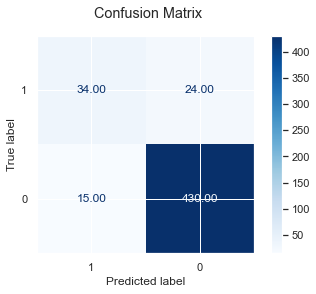

In [12]:
plot = metrics.plot_confusion_matrix(pipeline, X_test, y_test, labels=[1,0], cmap = plt.cm.Blues, values_format = '.2f')
plot.figure_.suptitle("Confusion Matrix")
plt.show()

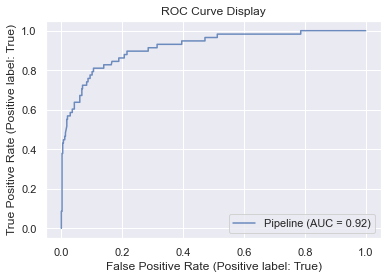

In [13]:
ax = plt.gca()
rfc_disp = metrics.RocCurveDisplay.from_estimator(pipeline, X_test, y_test, ax=ax, alpha=0.8)
plt.title('ROC Curve Display')
plt.show()

### Oversampling to improve recall performance 
The number of Classes before fit from training set: {False: 1048, True: 125}. 
Will try over sampling to see if recall can improve.

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

X = df.drop("Attrition", axis = 1)
y = df.Attrition == "Yes"

num_cols = [col for col in X.columns if X[col].dtypes in ("int64", "float64")]
cat_cols = [col for col in X.columns if X[col].dtypes in ("object", "category")]

t = ([
    ('cat', OneHotEncoder(), cat_cols), 
    ('num', MinMaxScaler(), num_cols)
    ])

pipeline = Pipeline(steps=[
        ('t', ColumnTransformer(transformers=t))], 
        )


transformed = pipeline.fit_transform(X)

transformed_df = pd.DataFrame(
    transformed, 
    columns=pipeline.get_feature_names_out()
)

X = transformed_df

In [15]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from collections import Counter

x_train, x_test, y_train, y_test = train_test_split(X,y,train_size= 0.7,random_state=42)
smote=SMOTE()
x_train_os, y_train_os = smote.fit_resample(x_train, y_train)
print("The number of Classes before fit {}".format(Counter(y_train)))
print("The number of Classes after fit {}".format(Counter(y_train_os)))

The number of Classes before fit Counter({False: 1048, True: 125})
The number of Classes after fit Counter({False: 1048, True: 1048})


In [16]:
model = LogisticRegression(C=1, max_iter=300, random_state=42)
model.fit(x_train_os, y_train_os)
y_predicted = model.predict(x_test)

In [17]:
from sklearn import metrics

model.score(x_test,y_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted))
print("Precision:",metrics.precision_score(y_test,y_predicted))
print("Recall:",metrics.recall_score(y_test, y_predicted))
print("F1 Score:",metrics.f1_score(y_test, y_predicted))

Accuracy: 0.8727634194831014
Precision: 0.5446428571428571
Recall: 0.8243243243243243
F1 Score: 0.6559139784946236


c:\Users\natha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


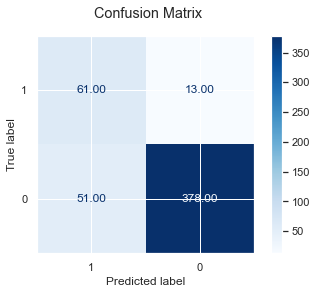

In [18]:
plot = metrics.plot_confusion_matrix(model, x_test, y_test, labels=[1,0], cmap = plt.cm.Blues, values_format = '.2f')
plot.figure_.suptitle("Confusion Matrix")
plt.show()

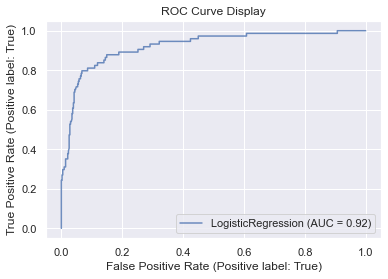

In [19]:
ax = plt.gca()
rfc_disp = metrics.RocCurveDisplay.from_estimator(model, x_test, y_test, ax=ax, alpha=0.8)
plt.title('ROC Curve Display')
plt.show()

### Undersampling
Oversampling provided an improvement in recall but reduced accuracy and increase in FP - trying undersampling to see if it improves.

In [20]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer

X = df.drop("Attrition", axis = 1)
y = df.Attrition == "Yes"

num_cols = [col for col in X.columns if X[col].dtypes in ("int64", "float64")]
cat_cols = [col for col in X.columns if X[col].dtypes in ("object", "category")]

t = ([
    ('cat', OneHotEncoder(), cat_cols), 
    ('num', MinMaxScaler(), num_cols)
    ])

pipeline = Pipeline(steps=[
        ('t', ColumnTransformer(transformers=t))], 
        )


transformed = pipeline.fit_transform(X)

transformed_df = pd.DataFrame(
    transformed, 
    columns=pipeline.get_feature_names_out()
)

X = transformed_df

In [21]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

x_train, x_test, y_train, y_test = train_test_split(X,y,train_size= 0.7,random_state=42)
smote=RandomUnderSampler()
x_train_os, y_train_os = smote.fit_resample(x_train, y_train)
print("The number of Classes before fit {}".format(Counter(y_train)))
print("The number of Classes after fit {}".format(Counter(y_train_os)))

The number of Classes before fit Counter({False: 1048, True: 125})
The number of Classes after fit Counter({False: 125, True: 125})


In [22]:
model = LogisticRegression(C=1, max_iter=300, random_state=42)
model.fit(x_train_os, y_train_os)
y_predicted = model.predict(x_test)

In [23]:
from sklearn import metrics

model.score(x_test,y_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted))
print("Precision:",metrics.precision_score(y_test,y_predicted))
print("Recall:",metrics.recall_score(y_test, y_predicted))
print("F1 Score:",metrics.f1_score(y_test, y_predicted))

Accuracy: 0.8290258449304175
Precision: 0.45454545454545453
Recall: 0.8108108108108109
F1 Score: 0.5825242718446602


c:\Users\natha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


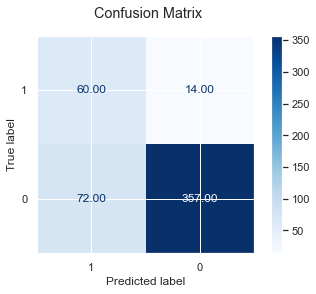

In [24]:
plot = metrics.plot_confusion_matrix(model, x_test, y_test, labels=[1,0], cmap = plt.cm.Blues, values_format = '.2f')
plot.figure_.suptitle("Confusion Matrix")
plt.show()

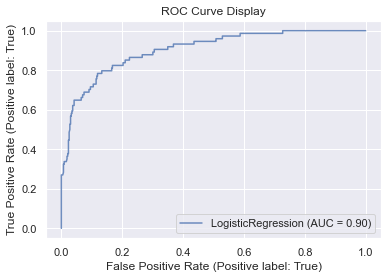

In [25]:
ax = plt.gca()
rfc_disp = metrics.RocCurveDisplay.from_estimator(model, x_test, y_test, ax=ax, alpha=0.8)
plt.title('ROC Curve Display')
plt.show()